# PROJETO 1 - Ciência dos Dados
 ## Ellen Beatriz Shen | 2B Engenharia

 ___

## Perguntas a serem respondidas:

**Pergunta 1:** É possível constatar que o "PIB per capita" de Portugal, em relação a países similares a ele, foi aumentado ao entrar na União Europeia? Podemos dizer que ocorreu uma evolução relativa melhor?


## Explicação da hipótese e mecanismo

A **União Europeia** é um bloco econômico e político constituido por 28 países europeus. Seus objetivos são ajudar os países-membros no seu desenvolvimento econômico, dar mais igualdade política e econômica à Europa, melhorar as condições econômicas e de trabalho dos cidadãos europeus, reduzir as desigualdades econômicas e sociais entre todas as regiões que compõem o bloco, garantir a permanência de um ambiente pacífico e harmonioso em toda a Europa. Suas características são livre circulação das pessoas pelos Estados-membros, livre circulação de mercadorias entre os Estados-membros, integração política, adoção de uma moeda única, o Euro.

- Como um dos objetivos principais da UE é o desenvolvimento econômico de seus países-membros, a hipótese busca comparar os dados de países pertencentes e não pertencentes a este bloco econômico. A análise vai ser baseada em um grupo de países que são economicamente similares, e que somente alguns entraram para a UE. Assim podemos utilizar variáveis como o 'PIB per capita' ao longo dos anos para a comparação.

## Bases de dados utilizadas

- dados retirados de https://www.gapminder.org/data/


___

## Análise dos Dados 

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [29]:
#Leitura dos Dados
dados_PIB = pd.read_excel('gdp_per_capita_yearly_growth.xlsx')
dados_renda = pd.read_excel('income_per_person_gdppercapita_ppp_inflation_adjusted.xlsx')
dados_mundo = pd.read_excel('WorldBank.xlsx')

In [35]:
dados_regiao = dados_mundo.loc[:,["Country","region"]]
dataframe_regiao = dados_regiao.set_index("Country")
europa = dataframe_regiao.loc[(dataframe_regiao.region=='europe_west') | (dataframe_regiao.region=='europe_east'),:]
europa

,region
Country,
Albania,europe_east
Armenia,europe_east
Austria,europe_west
Azerbaijan,europe_east
Belarus,europe_east
Belgium,europe_west
Bosnia and Herzegovina,europe_east
Bulgaria,europe_east
Croatia,europe_east


### PIB

In [3]:
#Filtração do PIB para cada país.
PIB_portugal = dados_PIB.loc[dados_PIB.country=="Portugal",:]
PIB_eslovaquia = dados_PIB.loc[dados_PIB.country=="Slovak Republic",:]
PIB_lituania = dados_PIB.loc[dados_PIB.country=="Lithuania",:]

### Renda

In [4]:
#Filtraçào da Renda de cada país
renda_portugal = dados_renda.loc[dados_renda.country=="Portugal",:]
renda_eslovaquia = dados_renda.loc[dados_renda.country=="Slovak Republic",:]
renda_lituania = dados_renda.loc[dados_renda.country=="Lithuania",:]

### Junção do PIB e Renda

Para começar a análise, comecei filtrando os anos de 1986 e 1987 das variáveis de "PIB per capita" e "renda" de 3 países situados na europa e economicamente parecidos. E ao fazer uma junçào desses dados, podemos observar que 1 ano após a entrada de Portugal para a UE há um aumento significante em comparaçao aos outros países.

In [5]:
#PIB
PIB_1986_1987 = dados_PIB.loc[:,["country",1986,1987]]
PIB_idx = PIB_1986_1987.set_index("country")

#Renda
renda_1986 = dados_renda.loc[:,["country",1986,1987]]
renda_idx = dados_renda.set_index("country")

#Dataframe de 1986 e 1987
dataframe_1986_1987 = PIB_idx.join(renda_idx, how='inner', lsuffix='_PIB', rsuffix='_Renda')

In [6]:
dataframe_PIB = dataframe_1986_1987.loc[["Portugal","Slovak Republic","Lithuania"],["1986_PIB","1987_PIB"]]
dataframe_PIB

,1986_PIB,1987_PIB
country,,
Portugal,4.03,6.300
Slovak Republic,1.67,0.311
Lithuania,3.21,0.442


In [7]:
dataframe_renda = dataframe_1986_1987.loc[["Portugal","Slovak Republic","Lithuania"],["1986_Renda","1987_Renda"]]
dataframe_renda

,1986_Renda,1987_Renda
country,,
Portugal,16100,17100
Slovak Republic,14700,14700
Lithuania,15800,15900


Porém, para fazer uma melhor análise seria adequada uma base com mais anos antes e depois de sua entrada para a UE. Então devemos fazer um filtro desses dados para cada país, a fim de poder utilizar gráficos para melhor comparação.

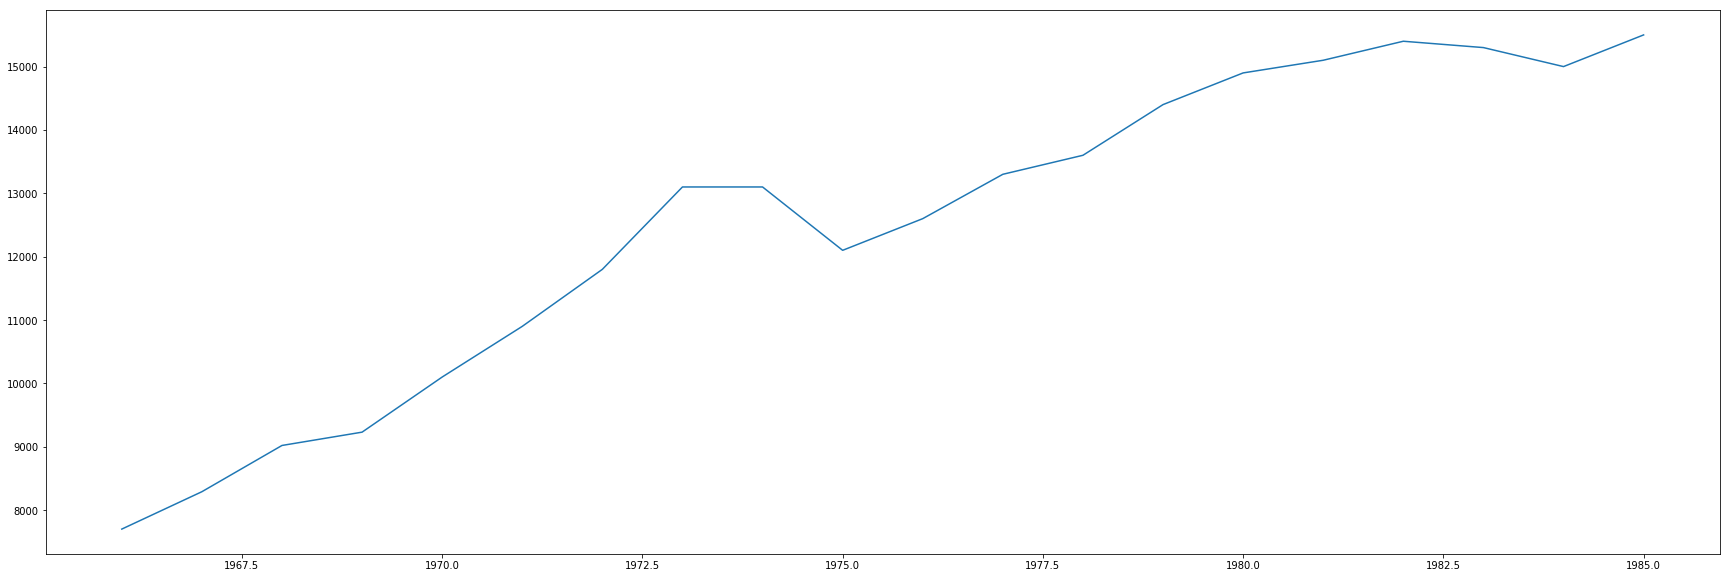

In [19]:
#sabendo que o ano de 1986 é a coluna de índice 187, posso fazer um slice para filtrar os anos.

#PIB
PIB_portugal_antes = PIB_portugal.iloc[:,167:187]
PIB_portugal_depois = PIB_portugal.iloc[:,187:207]

#Renda
renda_portugal_antes = renda_portugal.iloc[:,167:187]
renda_portugal_depois = renda_portugal.iloc[:,187:207]

#Visualização de como os dados ficam
media_renda_port = renda_portugal_antes.mean()
x = media_renda_port.index
plt.figure(figsize=(30,10))
plt.plot(x,media_renda_port)

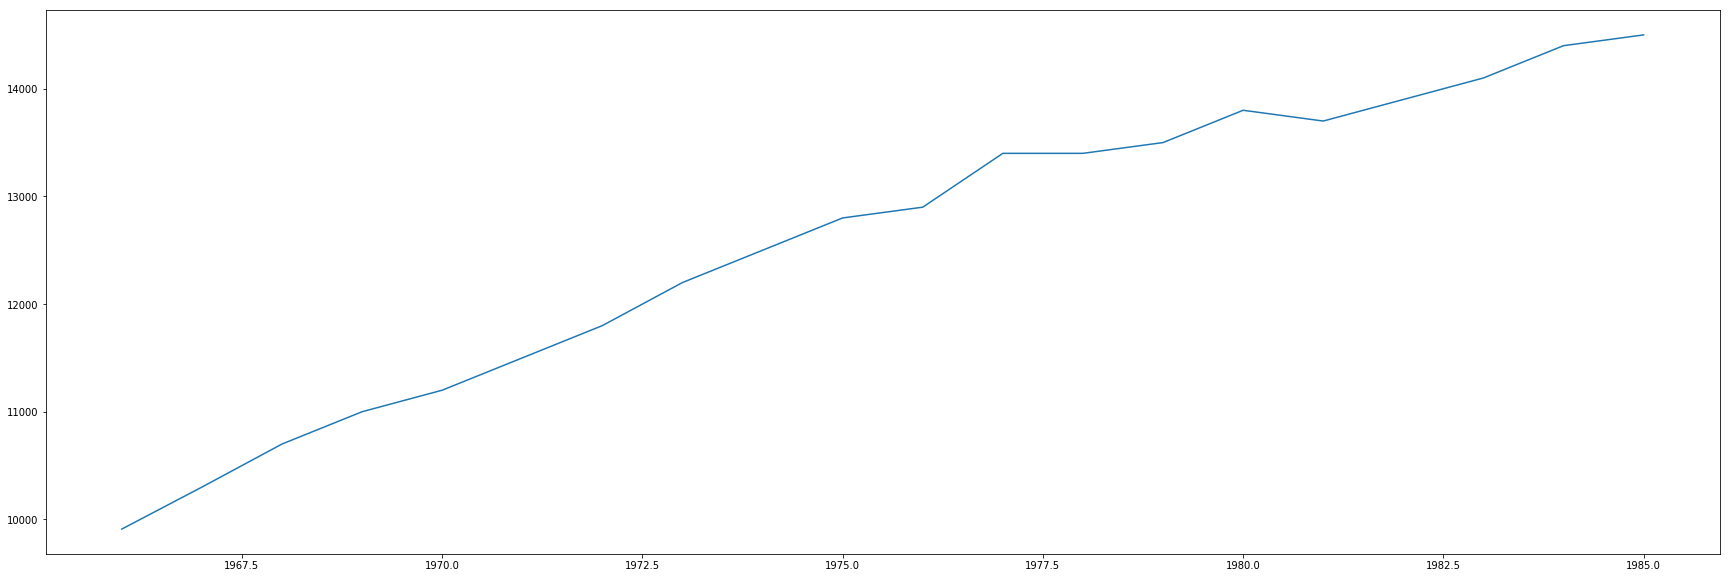

In [20]:
#PIB
PIB_eslovaquia_antes = PIB_eslovaquia.iloc[:,167:187]
PIB_eslovaquia_depois = PIB_eslovaquia.iloc[:,187:207]

#Renda
renda_eslovaquia_antes = renda_eslovaquia.iloc[:,167:187]
renda_eslovaquia_depois = renda_eslovaquia.iloc[:,187:207]

media_renda_eslovaquia = renda_eslovaquia_antes.mean()
x1 = media_renda_eslovaquia.index
plt.figure(figsize=(30,10))
plt.plot(x1, media_renda_eslovaquia)

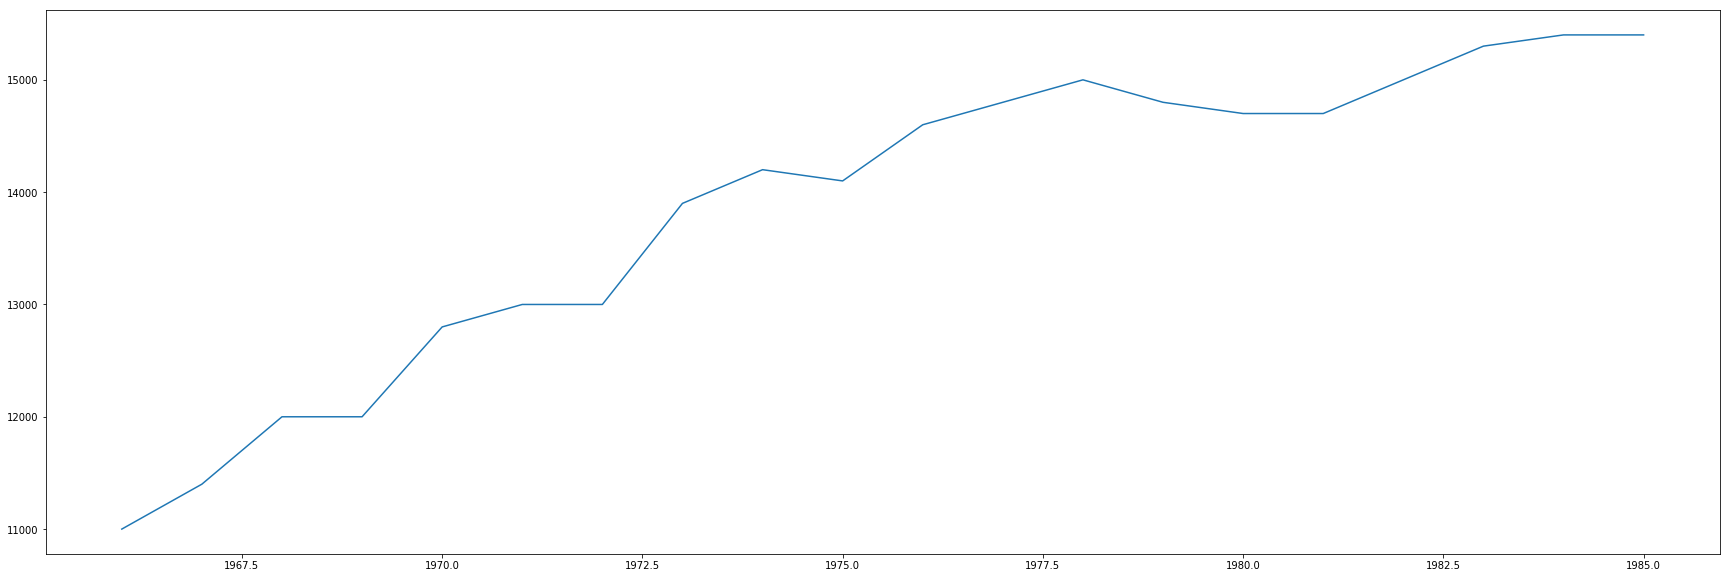

In [21]:
#PIB
PIB_lituania_antes = PIB_lituania.iloc[:,167:187]
PIB_lituania_depois = PIB_lituania.iloc[:,187:207]

#Renda
renda_lituania_antes = renda_lituania.iloc[:,167:187]
renda_lituania_depois = renda_lituania.iloc[:,187:207]

media_renda_lit = renda_lituania_antes.mean()
x2 = media_renda_lit.index
plt.figure(figsize=(30,10))
plt.plot(x2, media_renda_lit)